<img src="https://raw.githubusercontent.com/flavio-mota/fundamentos-pln/master/unifei-inpe.png" align="right" width="150" />

<br/>
<br/>

# <span style="color:#336699">Introdução ao Processamento de Linguagem Natural (PLN)</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autores: <br/> 
    Flávio Belizário da Silva Mota¹ <br/>
    Isabela Neves Drummond²
    <br/><br/>
    ¹Instituto Nacional de Pesquisas Espaciais (INPE) <br/>
    ²Universidade Federal de Itajubá (UNIFEI)
    <br/>
    <br/><br/>
    Contato: <a href="mailto:flavio.mota@inpe.br">flavio.mota@inpe.br</a>; <a href="mailto:isadrummond@unifei.edu.br">isadrummond@unifei.edu.br</a>
    <br/>
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar alguns conceitos báscios de PLN.
</div>

<br/>

## Objetivos gerais:


*   Apresentar noções básicas de sobre o que é o PLN
*   Criar funções simples que realizem a limpeza e análise de textos
*   Realizar algumas análises quantitativas
*   Aplicar etiquetagem morfossintáticas às palavras do corpus
*   Geração de gráficos
*   Classificação de textos



## Começando com uma análise simples de textos

Vamos criar uma variável chamada `sentenca` e armazenar uma pequena frase nela:

In [1]:
sentenca = 'A raposa rápida salta sobre o cão preguiçoso'

Vamos verificar agora a ocorrência de uma palavra dentro da sentença:

In [2]:
'rápida' in sentenca

True

O código acima retorna `True`, indicando que a palavra 'rápida' existe dentro da sentença. Se fosse utilizada a palavra 'gato', o retorno seria `False`, uma vez que essa palavra não existe na frase.

Agora, vamos retornar uma determinada palavra da frase através de sua posição. No exemplo a seguir, o código retorna a palavra na 5ª posição da sentença:

In [3]:
sentenca.split()[2]

'rápida'

Para exibir uma determinada palavra de trás para frente, podemos utilizar:

In [4]:
sentenca.split()[1][::-1]

'asopar'

Para exibir toda a sentença invertida:

In [5]:
sentenca[::-1]

'osoçiugerp oãc o erbos atlas adipár asopar A'

Vamos concatenar a primeira e a última palavra da sentença:

In [6]:
palavras = sentenca.split() #Vamos criar uma variável para armazenar as palavras
primeira_palavra = palavras[0] #Recuperamos a primeira palavra (posição 0)
ultima_palavra = palavras[len(palavras)-1] #Recuperamos a última palavra (tamanho do vetor de palavras menos 1)
concatenar_palavras = primeira_palavra + ultima_palavra
print(concatenar_palavras)

Apreguiçoso


Para encontrar as palavras que estão em posições pares da sentença, podemos utilizar:

In [7]:
[palavras[i] for i in range(len(palavras)) if i%2 == 0]

['A', 'rápida', 'sobre', 'cão']

## A biblioteca NLTK

Link para documentação: [NLTK](https://www.nltk.org/)

## Tarefas do PLN

Ao trabalhar com textos no PLN, diversas tarefas podem ser executadas, como a *tokenização*, limpeza do texto, etiquetagem, contagens de palavras, *stemming*, etc. Vermos algumas dessas tarefas a seguir.

### Tokenização

A *tokenização* é o processo de dividir as sentenças em palavras. Considere a frase:
> "Eu estou lendo um livro."

A tarefa de *tokenização* tem como objetivo extrair as palavras (ou tokens) dessa sentença, produzindo:
> 'Eu', 'estou', 'lendo', 'um', 'livro', ' . '

Esse tipo de extração é chamada de 'unigrama', uma vez que separa uma palavra por vez. Entretanto, é possível realizar a extraçã de dois ou três *tokens* por vez. Se são 2 *tokens* por vez, chamamos de **bigramas**. Se são 3, **trigramas**. Dependendo da necessidade, podemos ter **n-gramas**, sendo n um número natural.

> **n-gramas** são sequências de n palavras de um texto.

No PLN trabalhamos com *tokens* por questão de conveniência, já que temos a tendência de realizar as análises palavra por palavra.



Vamos realizar a tokenização de uma sentença simples. Para isso vamos utilizar um módulo da NLTK que facilita esse processo.

In [8]:
import nltk #importando a biblioteca
nltk.download('all') # baixando todos os recursos da biblioteca (pode demorar)
from nltk import word_tokenize #importando o módulo word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [9]:
palavras = word_tokenize('Eu estou aprendendo sobre os fundamentos do PLN')

In [10]:
palavras

['Eu', 'estou', 'aprendendo', 'sobre', 'os', 'fundamentos', 'do', 'PLN']

Aplicar essa tarefa em frases simples pode não parecer muito útil. Sendo assim, vamos ver exemplos com um *corpus*.

#### O que é e para que serve um *corpus*?

*Corpus* pode ser definido como o conjunto de materiais linguísticos que serão analisados. Para os propósitos do PLN, é necessário que esses materiais estejam na forma de texto e que possam ser lidos por um programa de computador.

Vamos criar um método de leitura de um arquivo txt que contém nosso corpus:

In [11]:
def ler(nome_arquivo):
  arquivo = open(nome_arquivo, 'r', encoding='utf-8')
  conteudo_arq = arquivo.read()
  arquivo.close()
  return conteudo_arq

Vamos carregar o romance "Dom Casmurro" (arquivo 'marm08.txt'):

In [12]:
import requests

url = 'https://raw.githubusercontent.com/flavio-mota/fundamentos-pln/master/marm08.txt'
r = requests.get(url, allow_redirects=True)

open('marm08.txt', 'wb').write(r.content)

obra = ler('marm08.txt')

Podemos agora obter a *tokenização* do livro Dom Casmurro:

In [13]:
palavras = word_tokenize(obra)
palavras

['Romance',
 ',',
 'Dom',
 'Casmurro',
 ',',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de',
 'referência',
 ':',
 'Obras',
 'Completas',
 'de',
 'Machado',
 'de',
 'Assis',
 ',',
 'vol',
 '.',
 'I',
 ',',
 'Nova',
 'Aguilar',
 ',',
 'Rio',
 'de',
 'Janeiro',
 ',',
 '1994',
 '.',
 'Publicado',
 'originalmente',
 'pela',
 'Editora',
 'Garnier',
 ',',
 'Rio',
 'de',
 'Janeiro',
 ',',
 '1899',
 '.',
 'CAPÍTULO',
 'PRIMEIRO',
 'DO',
 'TÍTULO',
 'Uma',
 'noite',
 'destas',
 ',',
 'vindo',
 'da',
 'cidade',
 'para',
 'o',
 'Engenho',
 'Novo',
 ',',
 'encontrei',
 'no',
 'trem',
 'da',
 'Central',
 'um',
 'rapaz',
 'aqui',
 'do',
 'bairro',
 ',',
 'que',
 'eu',
 'conheço',
 'de',
 'vista',
 'e',
 'de',
 'chapéu',
 '.',
 'Cumprimentou-me',
 ',',
 'sentou-se',
 'ao',
 'pé',
 'de',
 'mim',
 ',',
 'falou',
 'da',
 'Lua',
 'e',
 'dos',
 'ministros',
 ',',
 'e',
 'acabou',
 'recitando-me',
 'versos',
 '.',
 'A',
 'viagem',
 'era',
 'curta',
 ',',
 'e',
 'os',
 'versos',
 'pode',
 'ser',
 'que',
 'nã

Podemos contar o tamanho do texto obtido:

In [14]:
len(palavras)

78952

In [15]:
len(obra)

373504

### Limpeza do texto

Em aplicações de PLN, são avaliadas unidades de texto como sílabas, palavras, frases, entre outras, e não os caracteres do texto. Sendo assim, geralmente são empregadas estratégias de limpeza do texto.

Vamos realizar a remoção da pontuação e a conversão de todo o texto para caracteres minúsculos. Podemos definir uma função para que isso possa ser feito sempre que necessário, sem repetição de códigos:

In [16]:
def limpar(lista):
  lixo = '.,:.;?!"`()[]{}\/|#$%^&*'
  quase_limpo = [x.strip(lixo).lower() for x in lista]
  return [x for x in quase_limpo if x.isalpha() or '-' in x]

In [17]:
corpus_sujo = ['banana', 'maçã.', 'abaca.te', ':Melancia']
print(limpar(corpus_sujo))

['banana', 'maçã', 'melancia']


Vamos comparar o copus da obra Dom Casmurro antes e depois da limpeza:

In [18]:
print("Antes da limpeza:", len(palavras))
palavras = limpar(palavras)
print("Depois da limpeza:", len(palavras))

Antes da limpeza: 78952
Depois da limpeza: 65228


Outra forma de realizar a limpeza de um *corpus* é através da remoção de **palavras vazias**. Palavras vazias são palavras que podem ser descartadas antes de uma análise pois possuem reduzida contribuição semântica ou nocional. Geralmente são preposições, artigos, conjunções, alguns pronomes e advérbios.

A NLTK traz uma lista de 203 palavras vazias para o português. Podemos importa-las usando:

In [19]:
vazias = nltk.corpus.stopwords.words('portuguese')

Vamos ver um exemplo:

In [20]:
sentenca = 'Eu estou aprendendo Python. É uma das linguagens de programação mais populares.'
palavras_da_sentenca = word_tokenize(sentenca)
print(palavras_da_sentenca)
sentenca_sem_palavras_vazias = ' '.join([palavra for palavra in palavras_da_sentenca if palavra not in vazias])
print(sentenca_sem_palavras_vazias)

['Eu', 'estou', 'aprendendo', 'Python', '.', 'É', 'uma', 'das', 'linguagens', 'de', 'programação', 'mais', 'populares', '.']
Eu aprendendo Python . É linguagens programação populares .


O código acima realizou a remoção das palavras que são consideradas vazias, deixando a sentença estranha para a leitura, mas com mais significado para análises com PLN.

Vamos criar uma função que remova as palavras vazias e aplicá-la a obra Dom Casmurro e verificar a mudança no tamanho do *corpus*.

In [21]:
def remove_vazias(lista):
  return [palavra for palavra in lista if palavra not in vazias]

In [22]:
print("Antes da limpeza de palavras vazias:", len(palavras))
palavras_sem_vazias = remove_vazias(palavras)
print("Depois da limpeza de palavras vazias:", len(palavras_sem_vazias))

Antes da limpeza de palavras vazias: 65228
Depois da limpeza de palavras vazias: 34519


### Contagens

Outra tarefa comum no PLN é a contagem de palavras para gerar algumas estatísticas e analisar o vocabulário.

#### Vocabulário

O vocabulário é basicamente uma lista de todas as palavras que aparecem no *corpus*. É como um dicionário, e sendo assim, não apresenta repetição de palavras. Podemos obter o vocabulário facilmente:

In [23]:
vocabulario_sem_limpeza = set(palavras)
print("Vocabulário sem a remoção de palavras vazias: ", len(vocabulario_sem_limpeza))
vocabulario = set(palavras_sem_vazias)
print("Vocabulário com a remoção de palavras vazias: ", len(vocabulario))

Vocabulário sem a remoção de palavras vazias:  9238
Vocabulário com a remoção de palavras vazias:  9066


#### Ocorrências

É comum querermos saber quais são as palavras que possuem mais ocorrências em um texto. Podemos criar um dicionário no Python que associa a palavra a sua contagem de ocorrências.

In [24]:
from collections import defaultdict
def ocorrencias(lista_palavras):
    dicionario = defaultdict(int)
    for p in lista_palavras:
        dicionario[p] += 1
    
    return dicionario

Utilizando a função acima, podemos obter uma estrutura do Python que contém uma chave e um valor, no nosso caso uma palavra e sua contagem de ocorrências.

Podemos utilizar uma função do Python chamada `sorted()` que, com algumas alterações, pode ordenar as palavras em função da sua ocorrência. No exemplo a seguir, veremos as 10 palavras mais frequentes considerando a obra Dom Casmurro sem a remoção das palavras vazias:

In [25]:
dic = ocorrencias(palavras)
mais_frequentes = sorted(dic.items(), key=lambda tupla:tupla[1], reverse=True)[:10]
for palavra, n in mais_frequentes:
    print(palavra, '\t', n)

que 	 2684
a 	 2490
e 	 2186
de 	 1975
o 	 1671
não 	 1524
um 	 771
é 	 718
os 	 660
da 	 626


Agora, o mesmo trecho pode ser utilizado para verificarmos as 10 mais frequentes com a limpeza de palavras vazias:

In [26]:
dic = ocorrencias(palavras_sem_vazias)
mais_frequentes = sorted(dic.items(), key=lambda tupla:tupla[1], reverse=True)[:20]
for palavra, n in mais_frequentes:
    print(palavra, '\t', n)

capitu 	 341
mãe 	 228
dias 	 192
tudo 	 189
capítulo 	 188
casa 	 169
olhos 	 163
mim 	 162
josé 	 159
assim 	 158
vez 	 147
agora 	 145
ainda 	 141
outra 	 138
nada 	 135
disse 	 123
tão 	 122
tempo 	 120
padre 	 112
escobar 	 110


### Stemming

O processo de *stemming* está relacionado a reduzir as palavras a suas raízes morfológicas, eliminando assim algumas formas flexionadas que possuem o mesmo significado.

Essa é uma estratégia que deve ser usada somente em determinadas situações, uma vez que homônimos indesejados podem surgir, como por exemplo: "nada", advérbio, e "nadaram", forma conjulgada do verbo "nadar", seriam reduzidas na raiz "nad". Todas essas raízes seriam contadas uma única vez, afetando a descrição do *corpus*. Porém a técnica pode ser útil na identificação de termos mais raros no *corpus*, as chamadas **Hápax legômena**.

Podemos utilizar um **stemmer** para reduzir as palavras. Vamos empregar um dos módulos da NLTK.

In [27]:
stemmer = nltk.stem.RSLPStemmer()
raizes = [stemmer.stem(x) for x in set(palavras)]
raizes[:10]

['jov',
 'copi',
 'preench',
 'acanh',
 'discut',
 'letr',
 'tir',
 'corp',
 'pis',
 'conhec']

### Etiquetagem

A etiquetagem morfossintática, também conhecida com PoS Tagging, é o processo no qual as palavras de um *corpus* recebem uma etiqueta que representa a parte do discurso (part of speech) equivalente a palavra.

Para realizar a etiquetagem, podemos empregar a biblioteca spaCy e seus componentes adicionais que permitem a etiquetagem de textos em português.

In [28]:
import spacy
spacy.cli.download("pt_core_news_sm") # Download dos recursos em pt-BR
nlp = spacy.load('pt_core_news_sm') # Carregamento dos recursos em pt-BR

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


Vamos executar um exemplo simples:

In [29]:
doc = nlp('Será que vai funcionar essa etiquetagem?')
etiq = [(x.orth_, x.pos_) for x in doc]
print(etiq)

[('Será', 'VERB'), ('que', 'SCONJ'), ('vai', 'AUX'), ('funcionar', 'VERB'), ('essa', 'DET'), ('etiquetagem', 'NOUN'), ('?', 'PUNCT')]


Note que as etiquetas representam as funções morfológicas de cada palavra. Esses rótulos estão em inglês. Esse [post](https://stackoverflow.com/questions/40288323/what-do-spacys-part-of-speech-and-dependency-tags-mean) do stackoverflow tem uma lista que ajuda a descobrir rapidamente o significado de cada uma.

### Gráficos

Alguns gráficos podem ser gerados para auxiliar na análise dos textos. Veremos dois: um gráfico de linha com as frequências dos *tokens* e um gráfico de barras para representar a etiquetagem.

#### Frequências

Vamos gerar um gráfico de linha para exibir as 20 palavras mais frequentes da obra Dom Casmurro. A NLTK possui um módulo que facilita a plotagem desse gráfico:


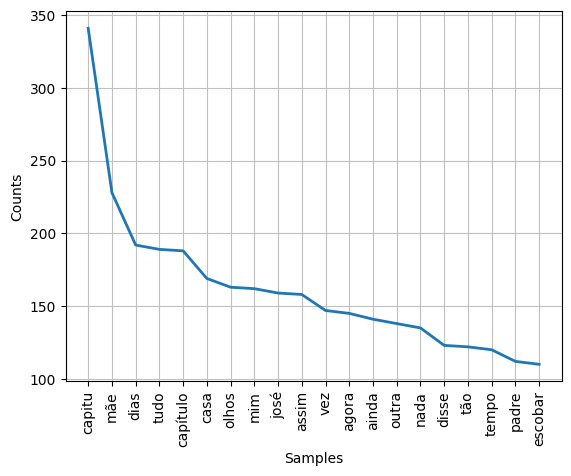

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
freq = nltk.FreqDist(palavras_sem_vazias)
freq.plot(20, cumulative=False)

#### Utilização de Partes do Discurso

Para visualizar as partes do discurso mais frequentes, utilizaremos apenas as etiquetas mais tradicionais, eliminando as de pontuação, espaços em branco, símbolos não-alfabéticos, numerais e palavras irreconhecíveis. Vamos utilizar também a biblioteca matplotlib, muito empregada no Python para a construção de gráficos. O código a seguir produz um gráfico de barras com a distribuição de frequência das partes do discurso na obra Dom Casmurro:

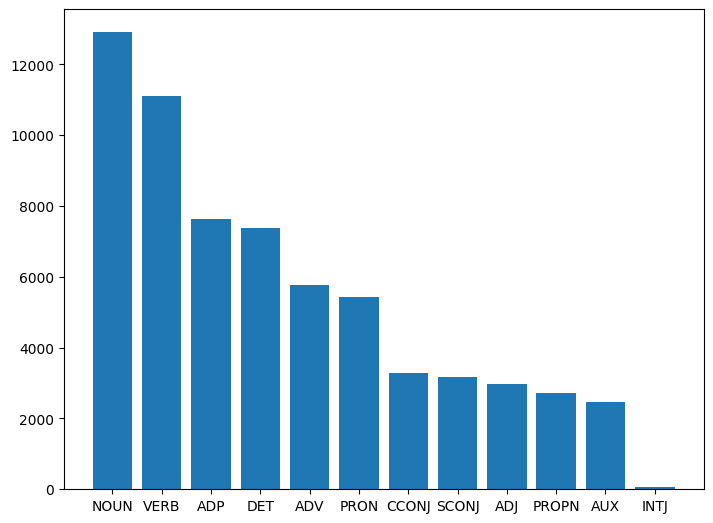

In [31]:
import matplotlib.pyplot as plt
from collections import defaultdict

lixo = ['PUNCT', 'SPACE', 'X', 'SYM', 'NUM']
doc = nlp(obra)
etiq = [(pal.orth_, pal.pos_) for pal in doc]
pos2 = [pos for (pal, pos) in etiq if pos not in lixo]
cont = defaultdict(int)
for p in pos2:
    cont[p] += 1
frequencia = sorted(cont.items(), key=lambda tupla:tupla[1], reverse=True)
cont = defaultdict(int)
for palavra, n in frequencia:
  cont[palavra] = n
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nomes = cont.keys()
ocorrencias = cont.values()
ax.bar(nomes,ocorrencias)
plt.show()

## Classificando textos

### Bag of Words (BoW)

Para implementar o Bag of Words com python, podemos utilizar a [scikit-learn](https://scikit-learn.org/stable/). Especificamente, utilizaremos a CountVectorizer, que é uma classe que permite gerar a representação no formato de matriz dos textos. Utilizaremos também a biblioteca pandas, mas não vamos entrar em detalhes nessa aula. Vamos importar as bibliotecas e criar nosso documento (corpus):

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['Ciência de Dados é uma interseção entre Artes e Ciência',
          'Geralmente, alunos de Artes usam o lado direito do cérebro e estudantes de Ciência o lado esquerdo',
          'Destacar-se tanto nas Artes quanto nas Ciências ao mesmo tempo é difícil',
          'Processamento de Linguagem Natural faz parte da Ciência de Dados']


Agora, vamos utilizar o CountVectorizer para criar a representação BoW:

In [33]:
bow = CountVectorizer()
bow_df = pd.DataFrame(bow.fit_transform(corpus).todense())
bow_df.columns = sorted(bow.vocabulary_)
bow_df.head()

,alunos,ao,artes,ciência,ciências,cérebro,da,dados,de,destacar,...,nas,natural,parte,processamento,quanto,se,tanto,tempo,uma,usam
0,0,0,1,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,1,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,1,0,0,0,0,1,...,2,0,0,0,1,1,1,1,0,0
3,0,0,0,1,0,0,1,1,2,0,...,0,1,1,1,0,0,0,0,0,0


Podemos criar também uma representação BoW somente com os 10 termos mais frequentes:

In [34]:
bow_10 = CountVectorizer(max_features=10)
bow_df_10 = pd.DataFrame(bow_10.fit_transform(corpus).todense())
bow_df_10.columns = sorted(bow_10.vocabulary_)
bow_df_10.head()

,artes,ciência,dados,de,lado,linguagem,mesmo,nas,natural,parte
0,1,2,1,1,0,0,0,0,0,0
1,1,1,0,2,2,0,0,0,0,0
2,1,0,0,0,0,0,1,2,0,0
3,0,1,1,2,0,1,0,0,1,1


### TF-IDF

Assim como na representação BoW, utilizaremos a scikit-learn para gerar o TF-IDF, através da classe TfidfVectorizer. Vamos empregar o mesmo corpus do exemplo anterior:

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['Ciência de Dados é uma interseção entre Artes e Ciência',
          'Geralmente, alunos de Artes usam o lado direito do cérebro e estudantes de Ciência o lado esquerdo',
          'Destacar-se tanto nas Artes quanto nas Ciências ao mesmo tempo é difícil',
          'Processamento de Linguagem Natural faz parte da Ciência de Dados']

Vamos gerar a representação TF-IDF:

In [36]:
tfidf = TfidfVectorizer()
tfidf_df = pd.DataFrame(tfidf.fit_transform(corpus).todense())
tfidf_df.columns = sorted(tfidf.vocabulary_)
tfidf_df.head()

,alunos,ao,artes,ciência,ciências,cérebro,da,dados,de,destacar,...,nas,natural,parte,processamento,quanto,se,tanto,tempo,uma,usam
0,0.000000,0.000000,0.259157,0.518314,0.000000,0.000000,0.00000,0.320110,0.259157,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.406019,0.000000
1,0.263117,0.000000,0.167944,0.167944,0.000000,0.263117,0.00000,0.000000,0.335889,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263117
2,0.000000,0.273104,0.174319,0.000000,0.273104,0.000000,0.00000,0.000000,0.000000,0.273104,...,0.546207,0.00000,0.00000,0.00000,0.273104,0.273104,0.273104,0.273104,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.216916,0.000000,0.000000,0.33984,0.267934,0.433831,0.000000,...,0.000000,0.33984,0.33984,0.33984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Classificando: Spam

Vamos classificar alguns textos como spam e não spam. Para isso, iremos empregar as técnicas que vimos anteriormente e um classificador. Ainda não vimos classificadores, mas não se preocupe. O intuito aqui é apenas ver uma das aplicações do Processamento de Linguagem Natural.

Primeiro, vamos importar as bibliotecas necessárias:

In [37]:
import pandas as pd
import numpy as np

Agora, vamos carregar o conjunto de dados que contém os textos e a indicação se se trata de um spam ou não:

In [38]:
url_spam = 'https://raw.githubusercontent.com/flavio-mota/fundamentos-pln/master/spam.csv'
df = pd.read_csv(url_spam,encoding='latin-1')
# checando as dimensões do conjunto de dados
df.shape

(5572, 5)

Vamos visualizar um exemplo do conjunto de dados:

In [39]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Vamos renomear as colunas, chamando v1 de rótulo e v2 de texto:

In [40]:
df = df.rename(columns={'v1': 'rotulo', 'v2': 'texto'})
df.head()

,rotulo,texto,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Vamos visualizar a distribuição das classes:

In [41]:
df.rotulo.value_counts()

ham     4825
spam     747
Name: rotulo, dtype: int64

Para representar as classes como valores numéricos de forma que o modelo de classificação consiga entender, vamos codificar cada valor (ham e spam) como 0 e 1, respectivamente, e gerar uma nova coluna chamada rotulo_num:

In [42]:
df['rotulo_num']=df.rotulo.map({"ham":0,"spam":1})
# checando a conversão
df.head()

,rotulo,texto,Unnamed: 2,Unnamed: 3,Unnamed: 4,rotulo_num
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


Vamos criar agora as variáveis x e y para armazenar os textos e os rótulos. X e y são nomes de variáveis muito empregadas no desenvolvimento de modelos de aprendizagem com python, sendo que X armazena os dados e y os rótulos:

In [43]:
x = df.texto
y = df.rotulo_num

É importante separar os dados em um conjunto de treinamento e um de testes:

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

print("Tamanho do conjunto de treino:", x_train.shape)
print("Tamanho do conjunto de teste:", x_test.shape)

Tamanho do conjunto de treino: (4179,)
Tamanho do conjunto de teste: (1393,)


Agora, iremos aplicar a vetorização dos dados com a técnica BoW:

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

Classificaremos os dados com o algoritmo Naïve Bayes. Esse algoritmo é um dos mais empregados em tarefas de classificação para aplicações de Processamento de Linguagem Natural:

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

Treinando o modelo:

In [47]:
%time nb.fit(x_train_dtm,y_train)

CPU times: user 4.62 ms, sys: 118 µs, total: 4.74 ms
Wall time: 9.18 ms


MultinomialNB()

Vamos gerar uma predição:

In [48]:
y_pred_class = nb.predict(x_test_dtm)

Calculando a acurácia do modelo:

In [49]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9820531227566404

O modelo alcançou uma acurácia de 98%. Mas será que ele está realmente acertando a classe que importa, ou seja, os spams?

Podemos utilizar uma matriz de confusão para verificar isso:

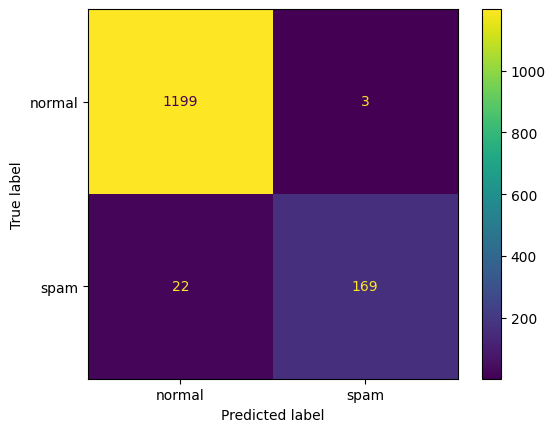

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['normal', 'spam'])
disp.plot()

plt.show()

A interpretação da matriz nos diz o seguinte:
* 1199 - eram spam e foram classificados como spam
* 3 - não eram spam, mas foram classicados como spam
* 22 - eram spam, mas não foram classificados como spam
* 169 - não eram spam, e não foram classificados como spam